In [227]:
# Import libraries
import numpy as np
from numpy import linalg as la

import random
import time

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

**Standard Search**

In [228]:
def StandardSearch(f, triple, tol, search_min=True, parabolic_interp=False):
    # function which searches for extrema of f(x) via a bracketing-and-bisection method
    # triple = (a c b) must bracket the minimum such that f(c) < f(a) and f(c) < f(b)
    
    pm = 1
    if search_min == False:
        pm = -1 # if we wish to search for a maximum of f(x) we must find minimum of -f(x)
    
    [a, c, b] = triple

    if pm*f(c) >= pm*f(a) and pm*f(c) >= pm*f(b): # sanity check input is bracketed
        return 'triple must be bracketed ie. f(c) < f(a) and f(c) < f(b)'
        
    if parabolic_interp == True:
        while b - c > tol:
            # parabolic interpolation
            x = b-0.5*((b-a)**2*(f(b)-f(c))-(b-c)**2*(f(b)-f(a)))/((b-a)*(f(b)-f(c))-(b-c)*(f(b)-f(a)))
            trial = f(x)
            
            if x > c:
                if pm*f(c) < pm*f(a) and pm*f(c) < pm*trial: # case 1A
                    [a, c, b] = [a, c, x]
                
                elif pm*trial < pm*f(c) and pm*trial < pm*f(b): # case 1B
                    [a, c, b] = [c, x, b]
            
            elif x < c:
                if pm*trial < pm*f(a) and pm*trial < pm*f(c): # case 2A
                    [a, c, b] = [a, x, c]
                
                elif pm*f(c) < pm*trial and pm*f(c) < pm*f(b): # case 2B
                    [a, c, b] = [x, c, b]
            
            elif x == c:
                [a, c, b] = [a, x, c]
            
        return c

    
    else:
        while b - c > tol:
            x1 = (c - a)/2
            x2 = (b - c)/2
            trial1 = f(x1)
            trial2 = f(x2)
                
            if pm*trial1 < pm*f(a) and pm*trial1 < pm*f(c): # case 1
                [a, c, b] = [a, x1, c]
                    
            elif pm*f(c) < pm*trial1 and pm*f(c) < pm*trial2: # case 2
                [a, c, b] = [x1, c, x2]
                
            elif pm*trial2 < pm*f(c) and pm*trial2 < pm*f(b): # case 3
                [a, c, b] = [c, x2, b]
                
        return c

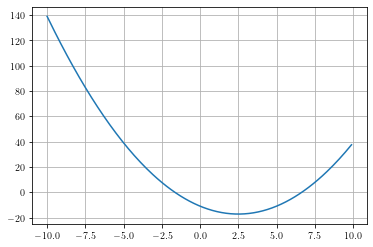

In [229]:
def f(x):
    return x**2 - 5*x - 11

x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.grid()

In [230]:
x_star = StandardSearch(f,[-2,4,7],1e-2,parabolic_interp=True)
x_star

2.5

**Golden Search**

In [231]:
def GoldenSearch(f, interval, tol, search_min=True):
    # function which searches for extrema of f(x) via a bracketing-and-bisection method
    # triple = (a c b) must bracket the minimum such that f(c) < f(a) and f(c) < f(b)
    
    pm = 1
    if search_min == False:
        pm = -1 # if we wish to search for a maximum of f(x) we must find minimum of -f(x)
    
    [a, b] = interval
    
    # choosing c (makes (c, b) the larger interval)
    phi_p = (np.sqrt(5) + 1)/2
    phi_m = (np.sqrt(5) - 1)/2
    p = (b - a)/phi_p
    c = a + p*phi_m

    if pm*f(c) >= pm*f(a) and pm*f(c) >= pm*f(b): # sanity check input is bracketed
        return 'triple must be bracketed ie. f(c) < f(a) and f(c) < f(b)'
        
    else:
        while b - c > tol:
            x = a + b - c
            trial = f(x)
            
            if x > c: # points {a,c,x,b} in ascending order
                if pm*f(c) < pm*f(a) and pm*f(c) < pm*trial: # case 1
                    [a, c, b] = [a, c, x]
                
                elif pm*trial < pm*f(c) and pm*trial < pm*f(b): # case 2
                    [a, c, b] = [c, x, b]
                    
            else: # points {a,x,c,b} in ascending order
                if pm*trial < pm*f(a) and pm*trial < pm*f(c): # case 1
                    [a, c, b] = [a, x, c]
                
                elif pm*f(c) < pm*trial and pm*f(c) < pm*f(b): # case 2
                    [a, c, b] = [x, c, b]
        
        return c

In [235]:
GoldenSearch(f,[1,7],1e-6)

2.500000425353804

**Method of Steepest Descent**

In [222]:
from scipy.optimize import line_search

def SteepestDescent(f, df, x0, tol, use_dual=False):
    # function designed to find the __minimum__ of f(x) taking x in R^n using method of steepest descent
    # if you want to use dual numbers to compute grad(f) via automatic differentiation, let argument df 
    # take any input
    
    xn = x0
    vn = -df(xn)/la.norm(df(xn))
    print(xn)
    print(vn)

    def line_minimiser(lamb):
        # function which performs line minimisation of f when implemented into Standard Search
        #global xn, vn
        return f(xn + lamb*vn)
    
    lamb_min = GoldenSearch(line_minimiser, [0,6], 1e-6)
    print(lamb_min)
    #line_minimiser = xn + lamb_min*vn
    #print(line_minimiser)
    #print(np.dot(df(line_minimiser),vn))
    print('\n')
    
    #while la.norm(df(xn)) > tol:
    fig = plt.figure(figsize=(8,6))
    for i in range(10):
        plt.scatter(xn[0],xn[1],color='k')
        print('xn = ', xn)
        print('vn = ', vn)
        print('lamb min = ', lamb_min)
        xn = xn + lamb_min*vn
        print('Dot = ', np.dot(df(xn),vn))
        vn = -df(xn)/la.norm(df(xn))
        print('xn new = ', xn)
        print('vn new = ', vn)
        print('%.4f ' % la.norm(df(xn)))
        print('\n')
    
    plt.xlabel('$x1$')
    plt.xlabel('$x2$')
    plt.grid()
    
    return xn

In [223]:
def f(x):
    return 0.5*(x[0]**2 + 4*x[1]**2)

def df(x):
    return np.array([x[0], 4*x[1]])

(2,)
(2,)


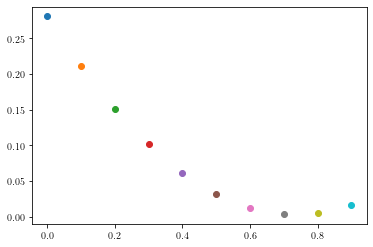

In [224]:
xn = np.array([1,4])
xn = np.array([0.74919812,-0.01283014])
vn = -df(xn)/la.norm(df(xn))
print(np.shape(xn))
print(np.shape(vn))
lambs = np.arange(0,1,0.1)

for i in lambs:
    plt.scatter(i,f(xn+i*vn))

[1 4]
[-0.06237829 -0.99805258]
4.019534709563281


xn =  [1 4]
vn =  [-0.06237829 -0.99805258]
lamb min =  4.019534709563281
Dot =  -1.342261308268089e-06
xn new =  [ 0.74926831 -0.01170698]
vn new =  [-0.99805269  0.0623765 ]
0.7507 


xn =  [ 0.74926831 -0.01170698]
vn =  [-0.99805269  0.0623765 ]
lamb min =  4.019534709563281
Dot =  3.3157224455821965
xn new =  [-3.26243912  0.23901753]
vn new =  [ 0.95964141 -0.28122655]
3.3996 


xn =  [-3.26243912  0.23901753]
vn =  [ 0.95964141 -0.28122655]
lamb min =  4.019534709563281
Dot =  1.5735860940778745
xn new =  [ 0.59487283 -0.89138233]
vn new =  [-0.16456531  0.98636619]
3.6148 


xn =  [ 0.59487283 -0.89138233]
vn =  [-0.16456531  0.98636619]
lamb min =  4.019534709563281
Dot =  12.136757833406856
xn new =  [-0.06660315  3.0733508 ]
vn new =  [ 0.00541772 -0.99998532]
12.2936 


xn =  [-0.06660315  3.0733508 ]
vn =  [ 0.00541772 -0.99998532]
lamb min =  4.019534709563281
Dot =  3.784201274435853
xn new =  [-0.04482645 -0.94612492]


array([4.80826281e-06, 3.07312747e+00])

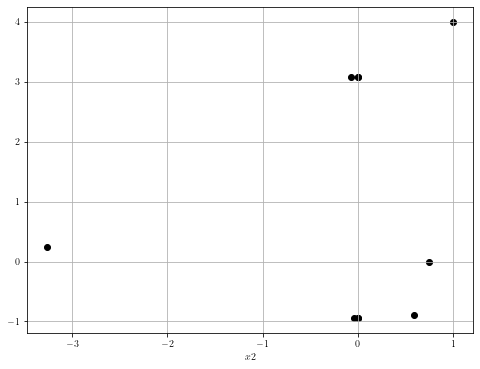

In [225]:
SteepestDescent(f, df, np.array([1,4]), 1e1)

In [ ]:
xn = np.array([1,4])
vn = np.array([-0.31622777, -0.9486833])
lambs = np.arange(-2.0,4.01,0.01)

for i in lambs:
    plt.scatter(i,f(xn + i*vn))